In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("eval_ckpt150_s1.csv")
display(df)

#read
obs_columns = [f'obs{i}' for i in range(15)]
obs_array = df[obs_columns].to_numpy()

obs_array = np.repeat(obs_array, repeats=3, axis=1) #repeat 3 times to simulate hisotry 3
obs_array.shape

,i,pos0,pos1,pos2,pos3,pos4,pos5,pos6,vel0,vel1,...,obs5,obs6,obs7,obs8,obs9,obs10,obs11,obs12,obs13,obs14
0,0,0.001748,0.000804,0.091593,0.260363,0.009699,-0.009958,2.562381,0.116498,0.094974,...,0.124308,0.089357,-0.091056,-0.360373,0.547365,-0.836894,-0.992651,0.121015,-0.408787,0.912630
1,1,0.002817,0.002083,0.100507,0.283329,0.045309,-0.026108,2.445708,0.084677,0.109515,...,0.165946,0.135671,-0.111126,-0.226640,0.641064,-0.767487,-0.992651,0.121015,-0.370924,0.928663
2,2,0.005180,0.003094,0.108242,0.302300,0.060459,-0.034419,2.252877,0.268941,0.073973,...,0.118719,0.009086,-0.011300,-0.534933,0.776263,-0.630409,-0.992651,0.121015,-0.345626,0.938372
3,3,0.008746,0.004053,0.114062,0.322077,0.059047,-0.034965,2.005245,0.313726,0.088008,...,0.157471,-0.008584,0.013889,-0.553445,0.907102,-0.420911,-0.992651,0.121015,-0.327775,0.944756
4,4,0.012606,0.005257,0.117382,0.348213,0.054433,-0.033763,1.756621,0.325402,0.112621,...,0.205245,-0.016611,0.021060,-0.551987,0.982784,-0.184757,-0.992651,0.121015,-0.308851,0.951110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,0.145024,0.334245,0.072604,-2.484036,0.032080,-2.095463,-44.277538,0.000095,0.000326,...,0.000469,-0.000062,-0.000335,-0.037250,-0.290971,0.956732,-0.002810,-0.999996,-0.998181,0.060286
3996,3996,0.145024,0.334249,0.072603,-2.484060,0.032027,-2.095536,-44.290478,0.000092,-0.000022,...,0.000346,0.000245,-0.000685,-0.024630,-0.303325,0.952887,-0.002810,-0.999996,-0.998188,0.060175
3997,3997,0.145027,0.334248,0.072603,-2.484014,0.031940,-2.095600,-44.302029,0.000388,-0.000400,...,0.000397,0.000519,-0.000264,-0.026178,-0.314312,0.949320,-0.002810,-0.999996,-0.998199,0.059996
3998,3998,0.145028,0.334250,0.072603,-2.484023,0.031876,-2.095661,-44.312550,0.000011,0.000731,...,0.000594,-0.000340,-0.000332,-0.022065,-0.324282,0.945961,-0.002810,-0.999996,-0.998207,0.059863


(4000, 45)

Text(0.5, 0, 'Time (s)')

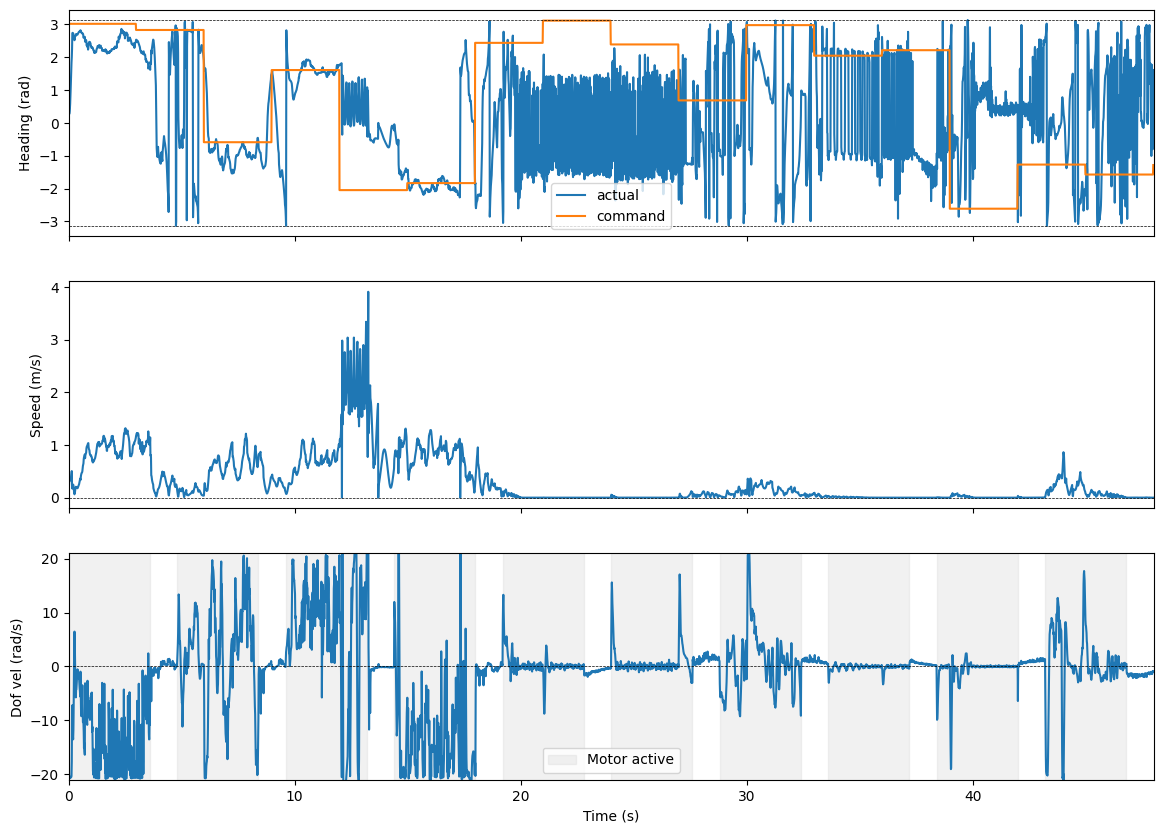

In [2]:
dt = 0.012
heading = np.arctan2(df['vel1'], df['vel0'])
speed = np.linalg.norm(df[['vel0', 'vel1']], axis=1)

des_heading = np.arctan2(df['obs12'], df['obs11']) 

# heading = np.unwrap(heading)
# diff = heading - des_heading
# wrapped_diff = (diff+np.pi)//(2*np.pi)
# # Add the wrapped difference back to angle2
# des_heading = des_heading + wrapped_diff*2*np.pi

fig, axs = plt.subplots(3,1, sharex=True, figsize=(14,10))
axs[0].plot(np.arange(len(df))*dt, heading, label='actual')
axs[0].plot(np.arange(len(df))*dt, des_heading, label='command')
axs[0].axhline(-np.pi, color='k', linestyle='dashed', linewidth=0.5)
axs[0].axhline(np.pi, color='k', linestyle='dashed', linewidth=0.5)
axs[0].set_ylabel('Heading (rad)')
axs[0].legend()


axs[1].plot(np.arange(len(df))*dt, speed)
axs[1].axhline(0, color='k', linestyle='dashed', linewidth=0.5)
axs[1].set_ylabel('Speed (m/s)')


action_filtered = np.zeros(len(df))
alpha = 0.6
for i in range(1, len(df)):
    action_filtered[i] = action_filtered[i-1]*alpha + df['action'][i]*(1-alpha)

axs[2].plot(np.arange(len(df))*dt, df['obs8']*37.5)
# axs[2].plot(np.arange(len(df))*dt, df['action'])
# axs[2].plot(np.arange(len(df))*dt, action_filtered)
axs[2].axhline(0, color='k', linestyle='dashed', linewidth=0.5)
axs[2].set_ylabel('Dof vel (rad/s)')
axs[2].set_xlim(0,len(df)*dt)

# Create mask for the colored region
episode_length = np.arange(len(df))
mask = ((episode_length % 400) > 0) & ((episode_length % 400) <= 300)

# Plot shaded region
axs[2].fill_between(np.arange(len(df))*dt, -100, 100, 
                    where=mask, 
                    color='lightgray', 
                    alpha=0.3,
                    label='Motor active')
axs[2].set_ylim(-21, 21) # Set reasonable y-limits
axs[2].legend()



axs[-1].set_xlabel('Time (s)')

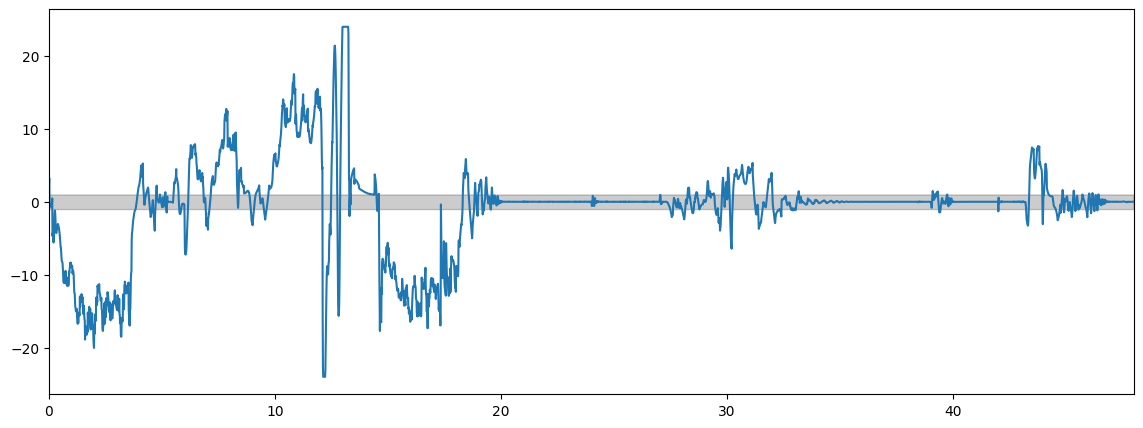

In [5]:
rollangvel = df['obs6']*24
plt.figure(figsize=(14,5))
plt.plot(np.arange(len(df))*dt, rollangvel)
plt.xlim(0, len(df)*dt)


plt.fill_between(np.arange(len(df))*dt, -1, 1, color='k', alpha=0.2)

/tmp/ipykernel_1754246/529650738.py:21: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,2000)


(2.7715149851215166, 2000)

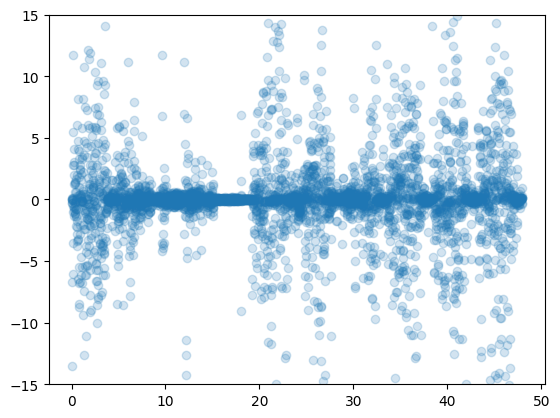

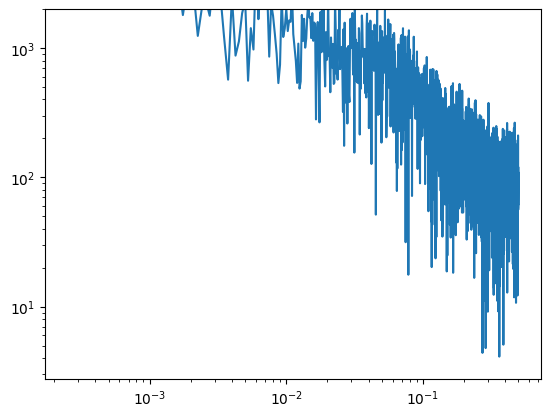

In [7]:
dofvel = df['obs8']*37.5
diffdofvel = np.diff(dofvel,prepend=0)

energy = diffdofvel**2
energy = np.cumsum(energy)

plt.figure()
plt.scatter(np.arange(len(df))*dt, diffdofvel, alpha=0.2)
plt.ylim(-15,15)

#FFT of dofvel
fft = np.fft.fft(dofvel)
frequencies = np.fft.fftfreq(len(dofvel))
plt.figure()
# plt.plot(frequencies, np.abs(fft))
#just the positive frequencies
plt.plot(frequencies[frequencies>0], np.abs(fft[frequencies>0]))
#make loglog
plt.xscale('log')
plt.yscale('log')
plt.ylim(0,2000)

